# Rf 7 0 4_Amplitudefit

Special p.d.f.'s: using a p.d.f defined by a sum of real-valued amplitude components




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:02 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Setup 2D amplitude functions
-------------------------------------------------------

Observables

In [2]:
t = ROOT.RooRealVar("t", "time", -1., 15.)
cosa = ROOT.RooRealVar("cosa", "cos(alpha)", -1., 1.)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Use ROOT.RooTruthModel to obtain compiled implementation of sinh/cosh
modulated decay functions

In [3]:
tau = ROOT.RooRealVar("tau", "#tau", 1.5)
deltaGamma = ROOT.RooRealVar("deltaGamma", "deltaGamma", 0.3)
tm = ROOT.RooTruthModel("tm", "tm", t)
coshGBasis = ROOT.RooFormulaVar(
    "coshGBasis",
    "exp(-@0/ @1)*cosh(@0*@2/2)",
    ROOT.RooArgList(
        t,
        tau,
        deltaGamma))
sinhGBasis = ROOT.RooFormulaVar(
    "sinhGBasis",
    "exp(-@0/ @1)*sinh(@0*@2/2)",
    ROOT.RooArgList(
        t,
        tau,
        deltaGamma))
coshGConv = tm.convolution(coshGBasis, t)
sinhGConv = tm.convolution(sinhGBasis, t)

Construct polynomial amplitudes in cos(a)

In [4]:
poly1 = ROOT.RooPolyVar(
    "poly1",
    "poly1",
    cosa,
    ROOT.RooArgList(
        ROOT.RooFit.RooConst(0.5),
        ROOT.RooFit.RooConst(0.2),
        ROOT.RooFit.RooConst(0.2)),
    0)
poly2 = ROOT.RooPolyVar("poly2", "poly2", cosa, ROOT.RooArgList(
    ROOT.RooFit.RooConst(1), ROOT.RooFit.RooConst(-0.2), ROOT.RooFit.RooConst(3)), 0)

Construct 2D amplitude as uncorrelated product of amp(t)*amp(cosa)

In [5]:
ampl1 = ROOT.RooProduct("ampl1", "amplitude 1",
                        ROOT.RooArgList(poly1, coshGConv))
ampl2 = ROOT.RooProduct("ampl2", "amplitude 2",
                        ROOT.RooArgList(poly2, sinhGConv))

Construct amplitude sum pdf
-----------------------------------------------------

Amplitude strengths

In [6]:
f1 = ROOT.RooRealVar("f1", "f1", 1, 0, 2)
f2 = ROOT.RooRealVar("f2", "f2", 0.5, 0, 2)

Construct pdf

In [7]:
pdf = ROOT.RooRealSumPdf("pdf", "pdf", ROOT.RooArgList(
    ampl1, ampl2), ROOT.RooArgList(f1, f2))

Generate some toy data from pdf

In [8]:
data = pdf.generate(ROOT.RooArgSet(t, cosa), 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


Fit pdf to toy data with only amplitude strength floating

In [9]:
pdf.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (ampl1,ampl2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           1.00000e+00  2.00000e-01    0.00000e+00  2.00000e+00
     2 f2           5.00000e-01  2.00000e-01    0.00000e+00  2.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 ****

Plot amplitude sum pdf
-------------------------------------------

Make 2D plots of amplitudes

In [10]:
hh_cos = ampl1.createHistogram("hh_cos", t, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(cosa, ROOT.RooFit.Binning(50)))
hh_sin = ampl2.createHistogram("hh_sin", t, ROOT.RooFit.Binning(
    50), ROOT.RooFit.YVar(cosa, ROOT.RooFit.Binning(50)))
hh_cos.SetLineColor(ROOT.kBlue)
hh_sin.SetLineColor(ROOT.kRed)

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(ampl1) WARNING extended mode requested for a non-pdf object, ignored
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(ampl2) WARNING extended mode requested for a non-pdf object, ignored


Make projection on t, data, and its components
Note component projections may be larger than sum because amplitudes can
be negative

In [11]:
frame1 = t.frame()
data.plotOn(frame1)
pdf.plotOn(frame1)

<ROOT.RooPlot object ("frame_t_557b9dd42860") at 0x557b9dd42860>

[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on t integrates over variables (cosa)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


workaround, see https://root.cern.ch/phpBB3/viewtopic.php?t=7764

In [12]:
ras_ampl1 = ROOT.RooArgSet(ampl1)
pdf.plotOn(frame1, ROOT.RooFit.Components(ras_ampl1),
           ROOT.RooFit.LineStyle(ROOT.kDashed))
ras_ampl2 = ROOT.RooArgSet(ampl2)
pdf.plotOn(frame1, ROOT.RooFit.Components(ras_ampl2), ROOT.RooFit.LineStyle(
    ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_t_557b9dd42860") at 0x557b9dd42860>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (ampl1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: (poly1,tm_conv_coshGBasis_[t],coshGBasis)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on t integrates over variables (cosa)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (ampl2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: (poly2,tm_conv_sinhGBasis_[t],sinhGBasis)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on t integrates over variables (cosa)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator 

Make projection on cosa, data, and its components
Note that components projection may be larger than sum because
amplitudes can be negative

In [13]:
frame2 = cosa.frame()
data.plotOn(frame2)
pdf.plotOn(frame2)
pdf.plotOn(frame2, ROOT.RooFit.Components(ras_ampl1),
           ROOT.RooFit.LineStyle(ROOT.kDashed))
pdf.plotOn(frame2, ROOT.RooFit.Components(ras_ampl2), ROOT.RooFit.LineStyle(
    ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

c = ROOT.TCanvas("rf704_amplitudefit", "rf704_amplitudefit", 800, 800)
c.Divide(2, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.20)
hh_cos.GetZaxis().SetTitleOffset(2.3)
hh_cos.Draw("surf")
c.cd(4)
ROOT.gPad.SetLeftMargin(0.20)
hh_sin.GetZaxis().SetTitleOffset(2.3)
hh_sin.Draw("surf")

c.SaveAs("rf704_amplitudefit.png")

[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on cosa integrates over variables (t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (ampl1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: (poly1,tm_conv_coshGBasis_[t],coshGBasis)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on cosa integrates over variables (t)
[#1] INFO:NumericIntegration

Info in <TCanvas::Print>: png file rf704_amplitudefit.png has been created


Draw all canvases 

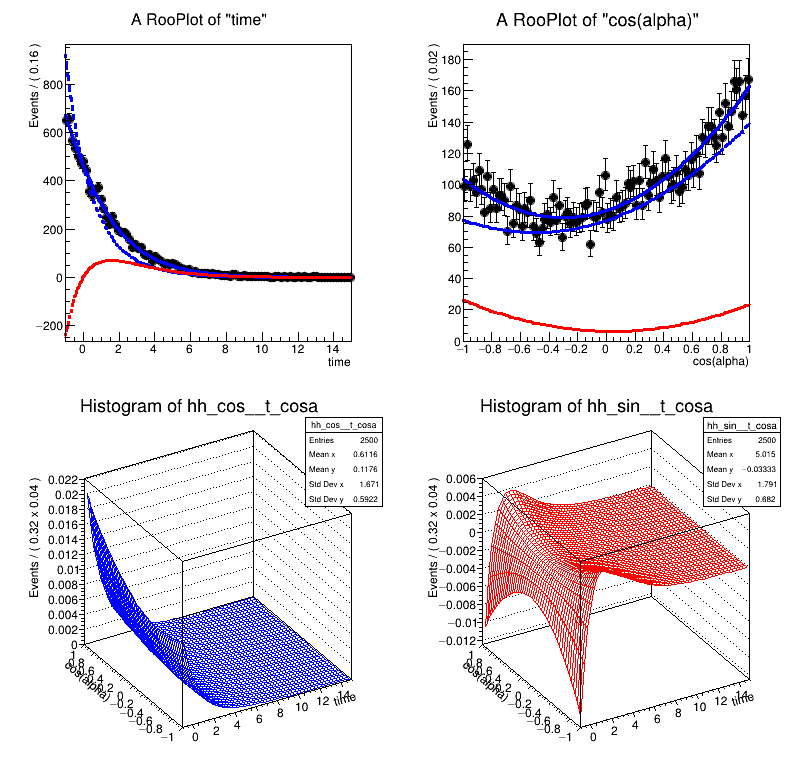

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()